Imports: Necessary libraries for data analysis and visualization.
Reads Data: Loads the dataset into a DataFrame.
Data Overview: Provides a quick overview of the dataset's dimensions, column headers, data types, and the first few rows.

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm, binom, poisson
import numpy as np
from IPython.display import display
from sklearn.utils import resample
from scipy.stats import sem, t, norm,chi2_contingency, pearsonr

# Read the dataset from the CSV file
data = pd.read_csv("Customer-Churn-Records 2025.csv",encoding='utf8')

# Get information about the data
print("Data Dimensions:", data.shape)
print("Column Headers:", data.columns.values)
print("Data Types:\n", data.dtypes)
print (data.head())

Data Dimensions: (10000, 18)
Column Headers: ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited' 'Complain' 'Satisfaction Score' 'Card Type'
 'Point Earned']
Data Types:
 RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619       NSW  Female   42   
1        

In [6]:
#To have an idea about the attributes in the DataFrame, we can list the numerical columns and the categorical columns separately.

# List the numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:")
display(pd.DataFrame({'column':numerical_columns}))
print("\n")

# List the categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical Columns:")
display(pd.DataFrame({'column':categorical_columns}))

#To print a small sample of the DataFrame data, we can use the `head()` method

Numerical Columns:



Categorical Columns:


,column
0,RowNumber
1,CustomerId
2,CreditScore
3,Age
4,Tenure
5,Balance
6,NumOfProducts
7,HasCrCard
8,IsActiveMember
9,EstimatedSalary


,column
0,Surname
1,Geography
2,Gender
3,Card Type


Missing data is a common issue that can affect the accuracy and reliability of your analysis.

Python provides various methods to detect and handle missing values, such as identifying missing data, imputing missing values, or removing rows/columns with missing data.

This example below demonstrates how to check for missing values using the .isnull().sum() method, impute missing values using the mean, and drop rows with missing values

In [7]:
# Check for missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


it indicates that there are no missing values in your dataset. This means that every cell in your DataFrame has a valid entry, and there are no NaN (Not a Number) or null values present in any of the columns

Duplicate Records
Duplicate records can skew your analysis and lead to inaccurate results

In [8]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


it indicates that there are no duplicate rows in your dataset. This means that each row in your DataFrame is unique and there are no repeated entries

Inconsistent Formats
Inconsistent data formats can cause errors and hinder analysis.

In [9]:
# Check city and state names
display(data[['Geography', 'Gender','Card Type']].sample(20))

,Geography,Gender,Card Type
4438,VIC,Male,GOLD
3285,VIC,Female,SILVER
3948,QLD,Male,DIAMOND
2264,NSW,Female,DIAMOND
2405,NSW,Male,PLATINUM
9696,NSW,Male,GOLD
8348,VIC,Female,PLATINUM
5340,QLD,Male,DIAMOND
5668,NSW,Male,DIAMOND
5108,QLD,Male,GOLD


There do not appear to be any data quality issues or anomalies in the provided sample output. The data looks clean and consistent for the "Geography","Card Type" and "Gender" columns.

In [10]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate basic statistical measures for each numerical column
mean_values = numerical_columns.mean()
median_values = numerical_columns.median()
mode_values = numerical_columns.mode().iloc[0]
percentiles_25 = numerical_columns.quantile(0.25)
percentiles_50 = numerical_columns.quantile(0.50)
percentiles_75 = numerical_columns.quantile(0.75)

# Display the results
#print("Mean Values:\n", mean_values)
#print("\nMedian Values:\n", median_values)
#print("\nMode Values:\n", mode_values)
#print("\n25th Percentiles:\n", percentiles_25)
#print("\n50th Percentiles (Median):\n", percentiles_50)
#print("\n75th Percentiles:\n", percentiles_75)

# Combine all statistical measures into a single DataFrame
statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    '25th Percentile': percentiles_25,
    '50th Percentile': percentiles_50,
    '75th Percentile': percentiles_75
})

# Display the statistical measures in a more readable format
pd.options.display.float_format = '{:.2f}'.format
print("Statistical Measures for Each Attribute:")
print(statistical_measures)

Statistical Measures for Each Attribute:
                          Mean      Median        Mode  25th Percentile  \
RowNumber              5000.50     5000.50        1.00          2500.75   
CustomerId         15690940.57 15690738.00 15565701.00      15628528.25   
CreditScore             650.53      652.00      850.00           584.00   
Age                      38.92       37.00       37.00            32.00   
Tenure                    5.01        5.00        2.00             3.00   
Balance               76485.89    97198.54        0.00             0.00   
NumOfProducts             1.53        1.00        1.00             1.00   
HasCrCard                 0.71        1.00        1.00             0.00   
IsActiveMember            0.52        1.00        1.00             0.00   
EstimatedSalary      100090.24   100193.91    24924.92         51002.11   
Exited                    0.20        0.00        0.00             0.00   
Complain                  0.20        0.00        0.00     

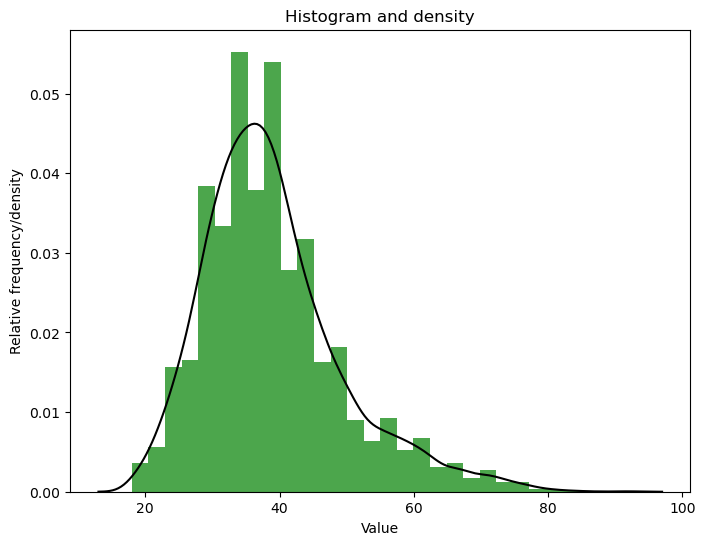

In [11]:
# Set up the figure - age plot_distribution
plt.figure(figsize=(8, 6))
 
# Create a histogram of the 'Age' column
plt.hist(data['Age'], bins=30, color="green", density=True, alpha=0.7)
 
# Create a density plot of the 'Age' column
sns.kdeplot(data['Age'], color="black",fill=False)
 
# Add labels and title
plt.title("Histogram and density")
plt.xlabel("Value")
plt.ylabel("Relative frequency/density")
 
# Show the plot
plt.show()

Central Tendency: The histogram and density plot indicate that the majority of customers are concentrated around the mean age. The peak of the density plot represents the most common age range among customers.
Spread: The spread of the histogram and the width of the density plot show the variability in customers' ages. The distribution appears to be relatively symmetric, with a slight skew towards older ages


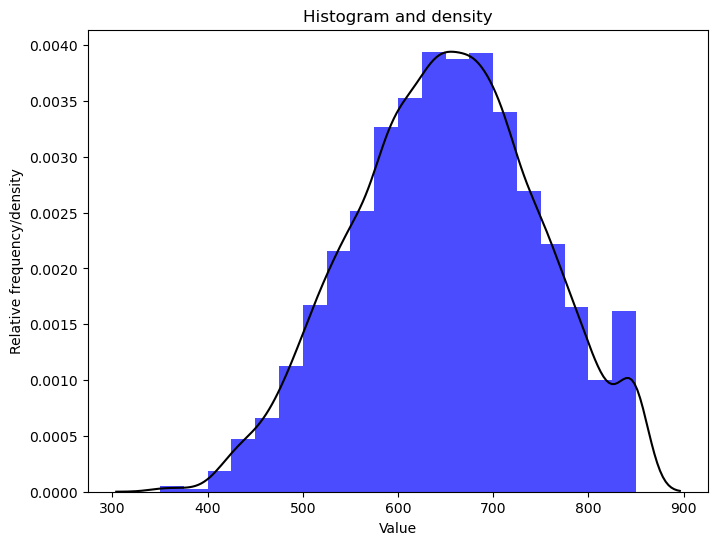

In [12]:
#This visualization helps identify the central tendency and spread of credit scores among customers, highlighting the overall distribution and variability. 

plt.figure(figsize=(8, 6))
plt.hist(data['CreditScore'], bins=20, color="blue", density=True, alpha=0.7)
sns.kdeplot(data['CreditScore'], color="black", fill=False)
plt.title("Histogram and density")
plt.xlabel("Value")
plt.ylabel("Relative frequency/density")
plt.show()

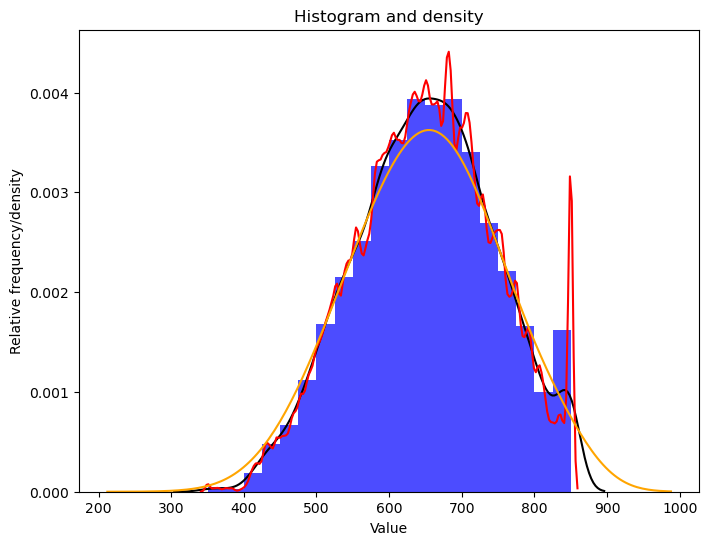

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['CreditScore'], bins=20, color="blue", density=True, alpha=0.7)
sns.kdeplot(data['CreditScore'], color="black", fill=False)
sns.kdeplot(data['CreditScore'], color="red", bw_adjust=0.2, fill=False)
sns.kdeplot(data['CreditScore'], color="orange", bw_adjust=3, fill=False)
plt.title("Histogram and density")
plt.xlabel("Value")
plt.ylabel("Relative frequency/density")
plt.show()


Central Tendency: The histogram and density plot indicate that the majority of customers have credit scores concentrated around the mean. The peak of the density plot represents the most common credit score range among customers.
Spread: The spread of the histogram and the width of the density plot show the variability in customers' credit scores. The distribution appears to be relatively symmetric, with a slight skew towards lower credit scores

/tmp/ipykernel_30/3844226207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CreditScore', y='Geography', data=data, width=0.7, palette='Set2')


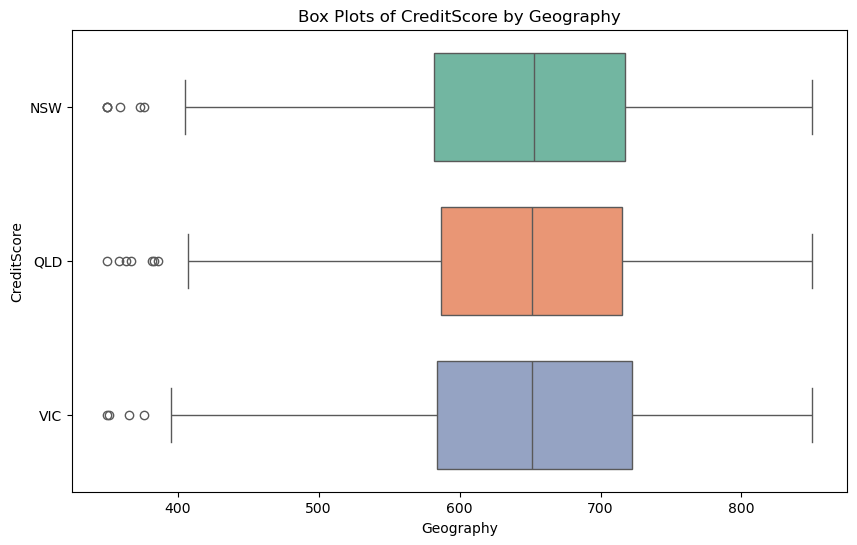

In [14]:
plt.figure(figsize=(10, 6))   
sns.boxplot(x='CreditScore', y='Geography', data=data, width=0.7, palette='Set2') 
  
plt.title("Box Plots of CreditScore by Geography") 
plt.xlabel("Geography") 
plt.ylabel("CreditScore") 
  
plt.show() 

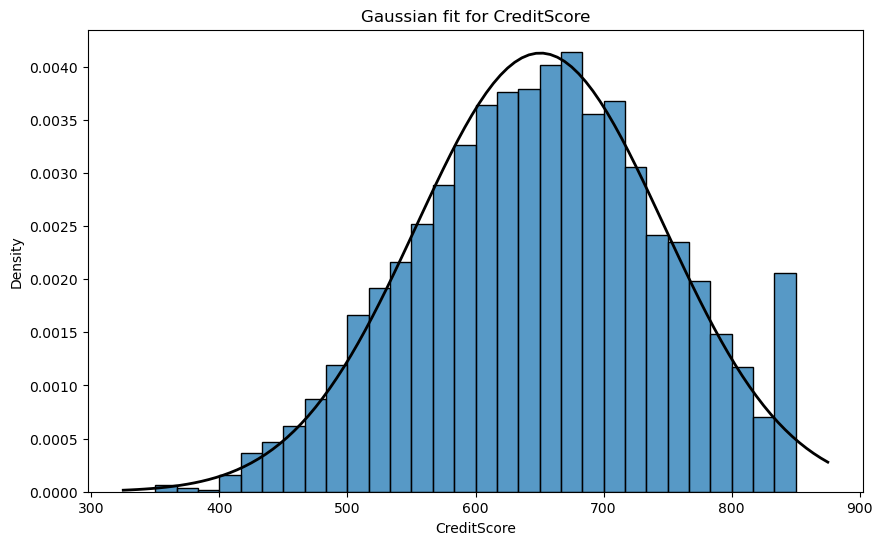

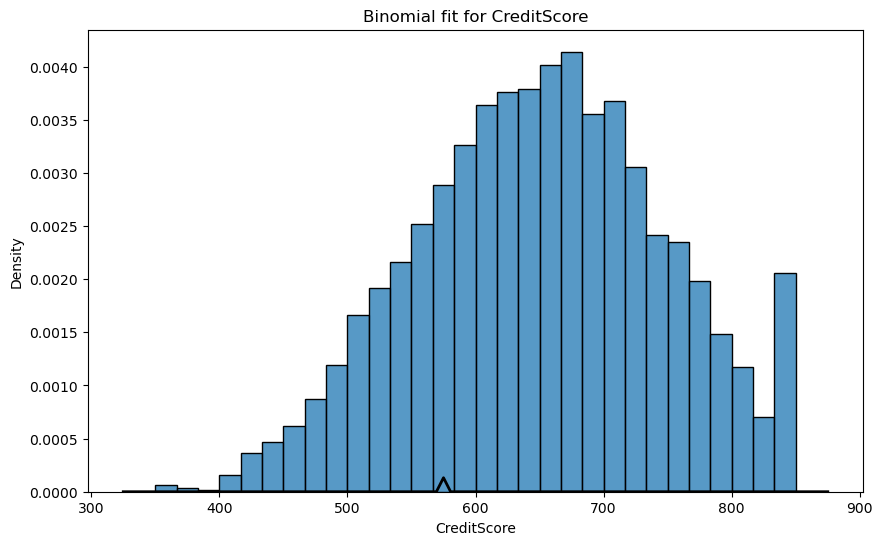

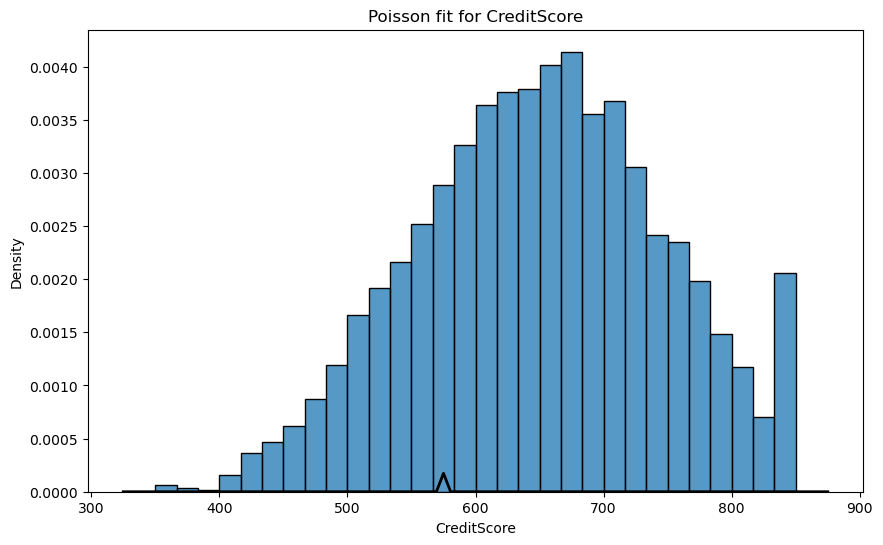

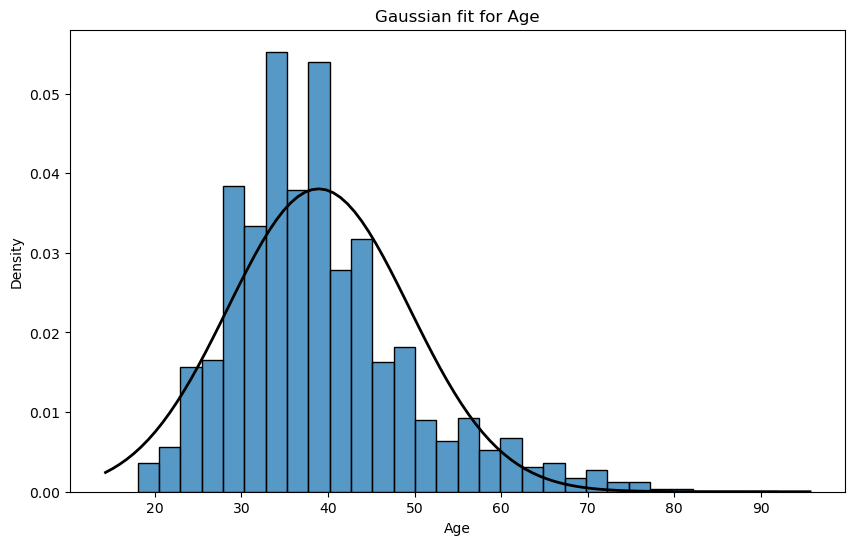

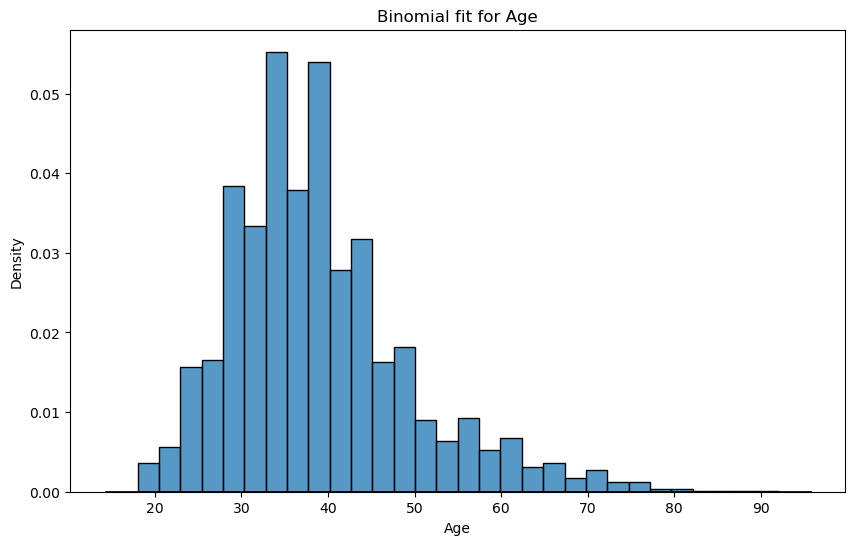

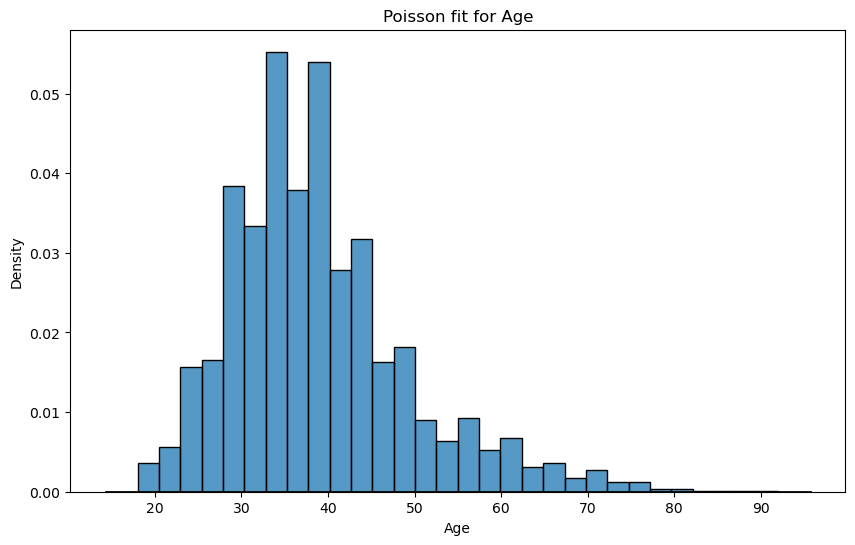

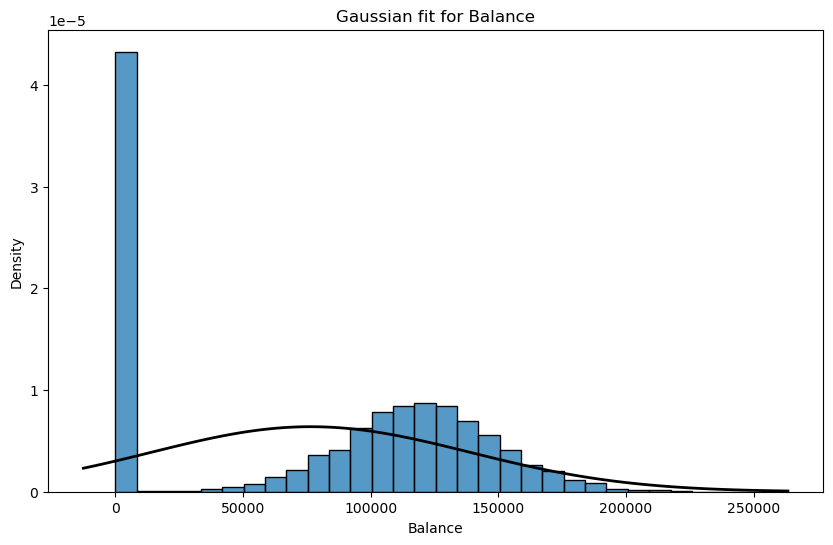

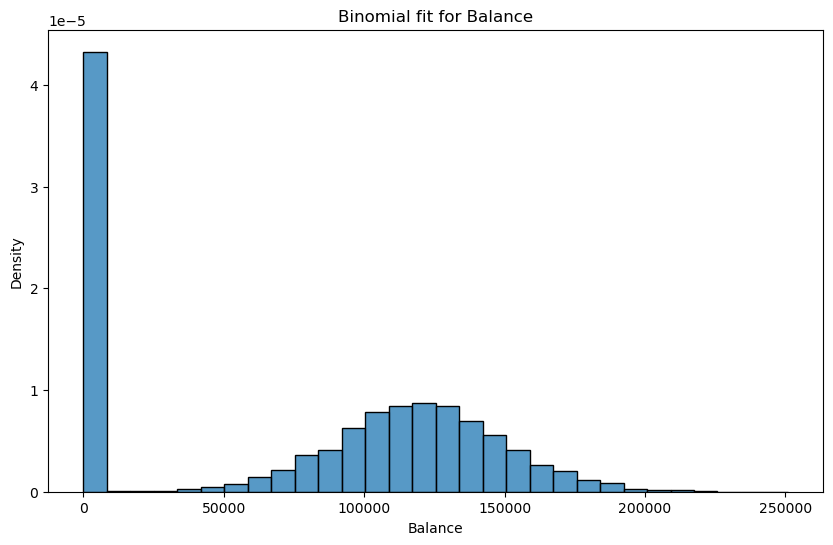

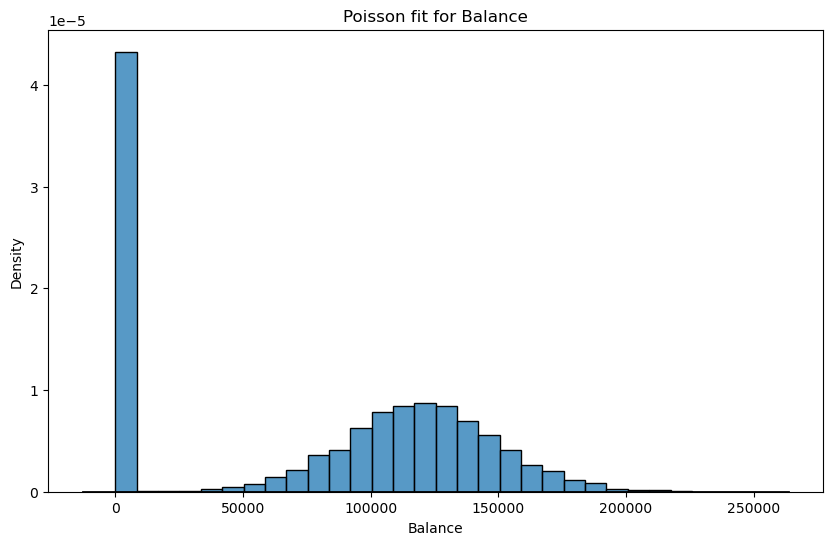

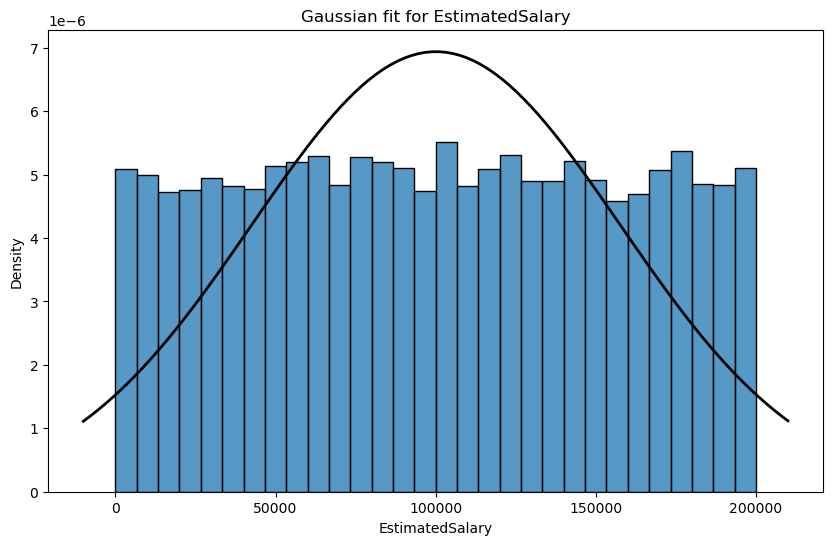

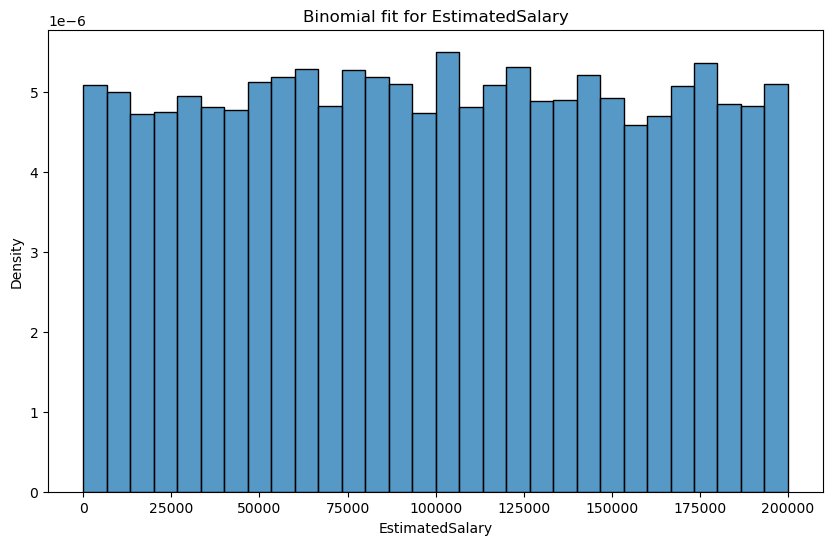

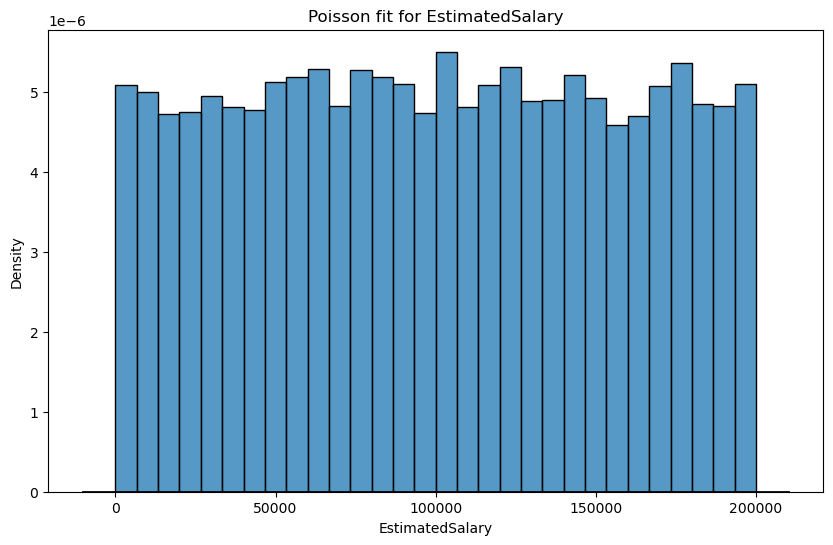

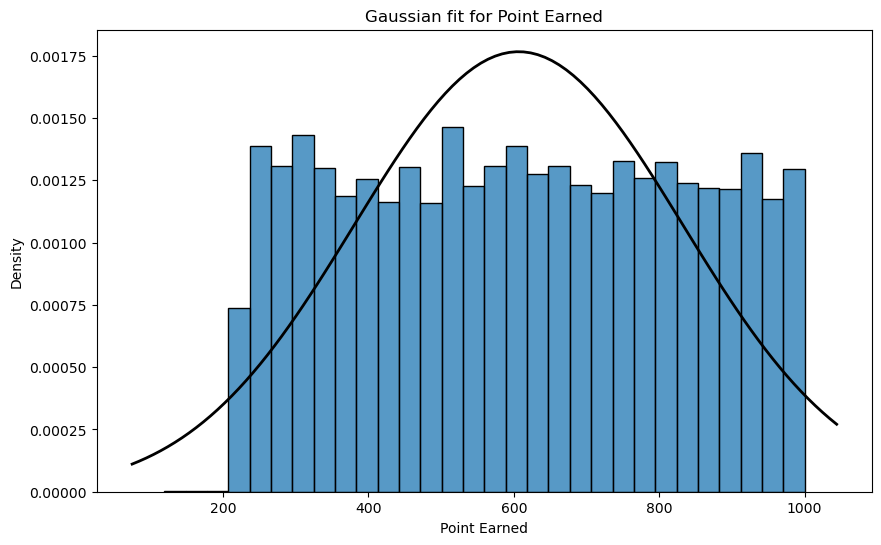

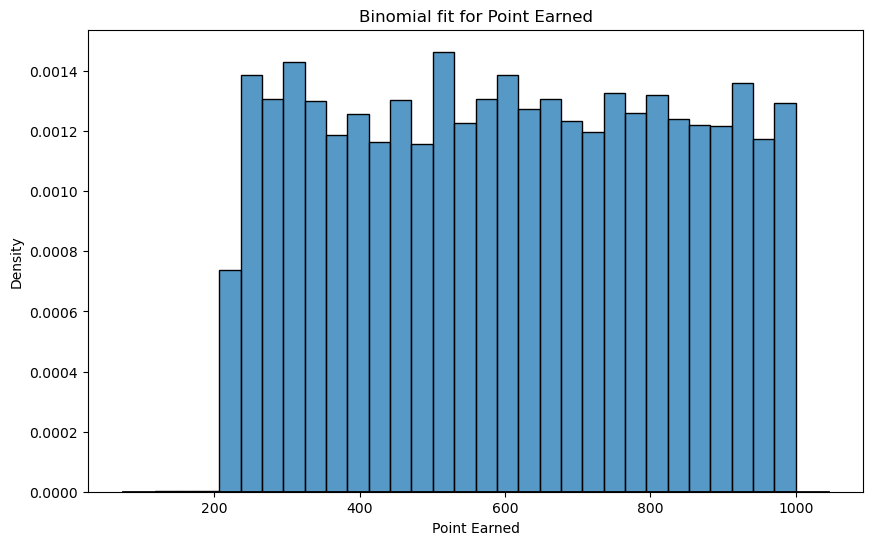

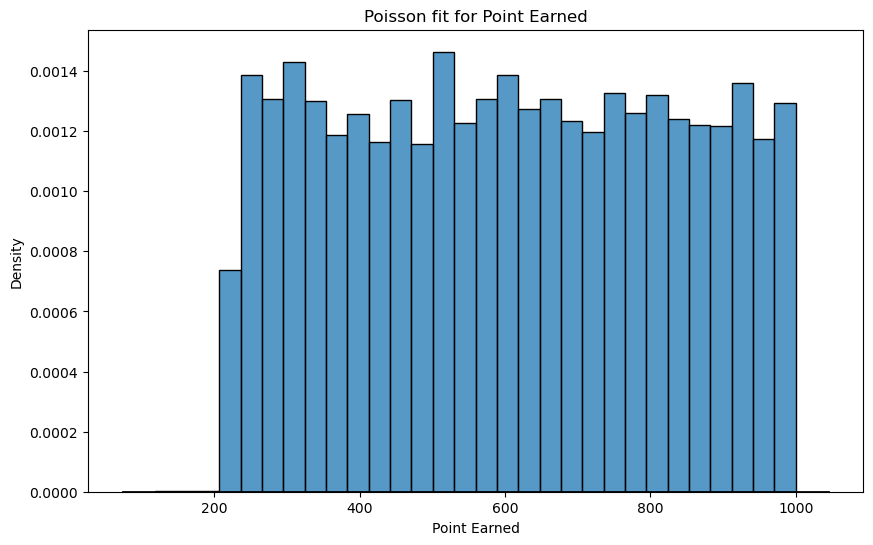

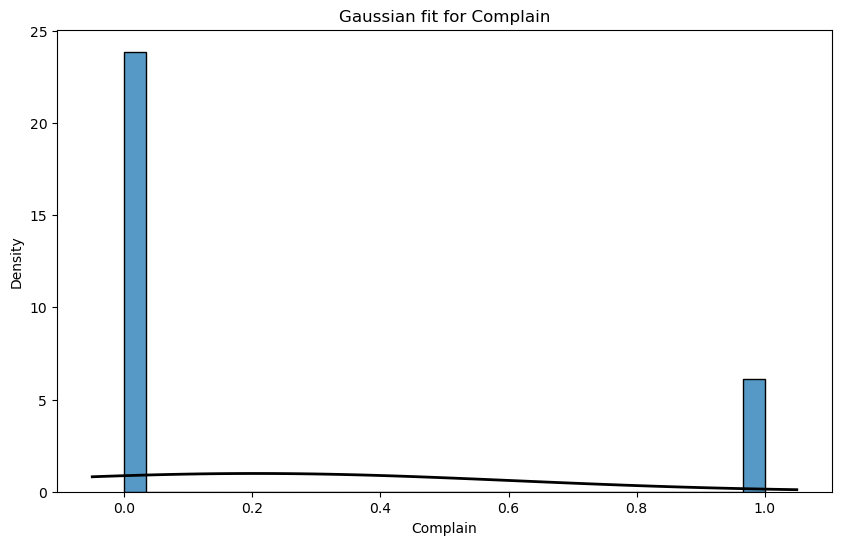

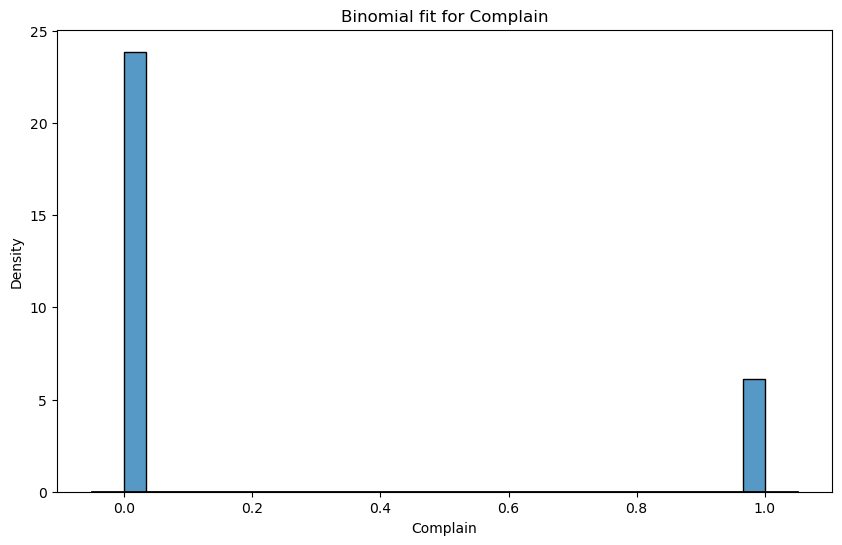

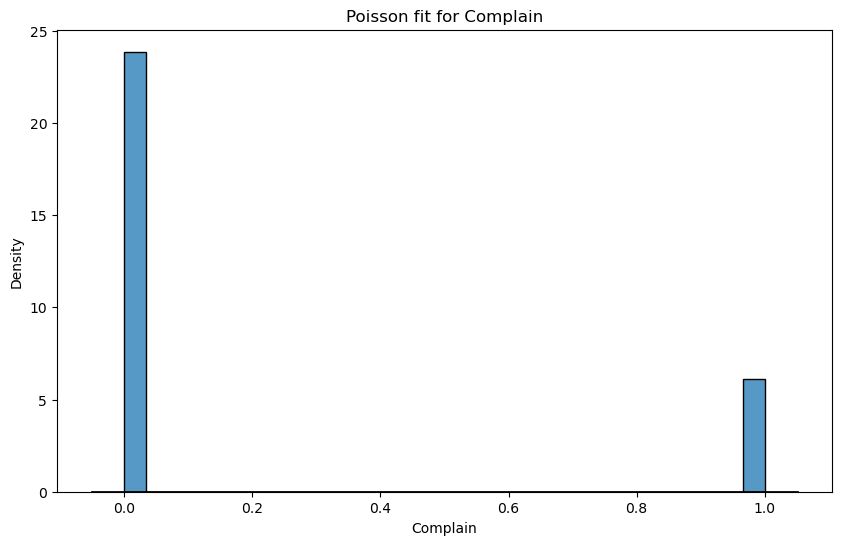

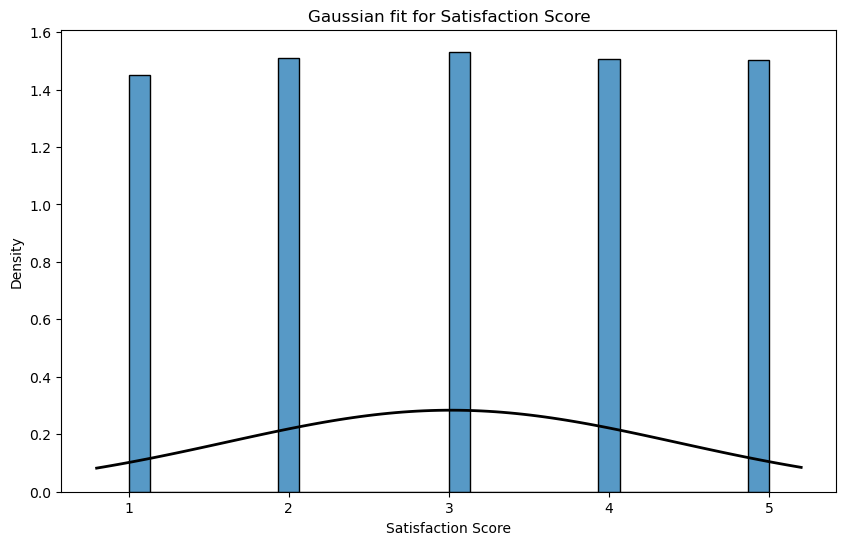

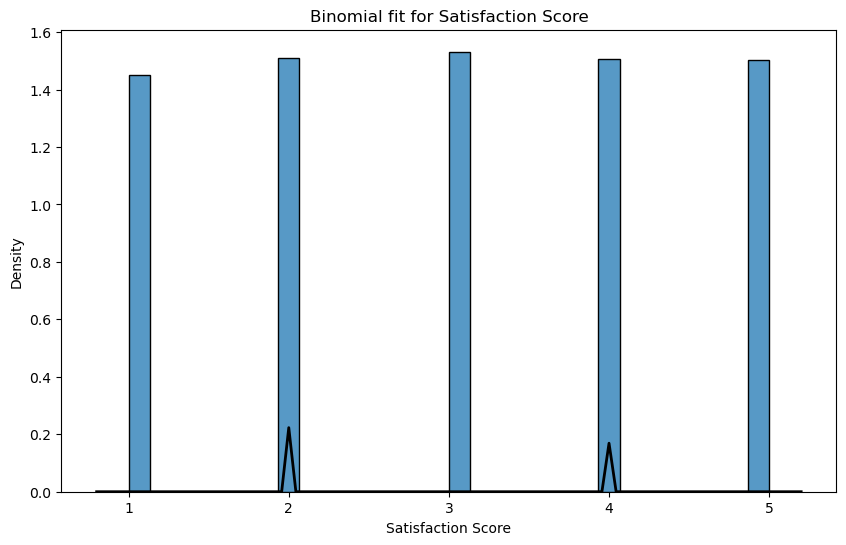

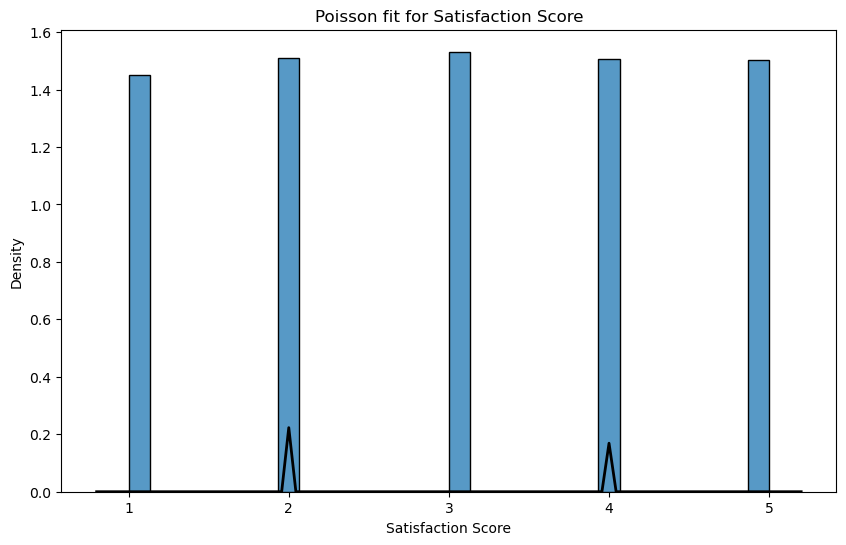

In [15]:
def plot_distribution(data, column, dist_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=False, stat="density", bins=30)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    if dist_name == 'Gaussian':
        p = norm.pdf(x, data[column].mean(), data[column].std())
    elif dist_name == 'Binomial':
        n = len(data)
        p = binom.pmf(x, n, data[column].mean()/n)
    elif dist_name == 'Poisson':
        p = poisson.pmf(x, data[column].mean())
    
    plt.plot(x, p, 'k', linewidth=2)
    title = f'{dist_name} fit for {column}'
    plt.title(title)
    plt.show()

columns_to_check = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Point Earned','Complain','Satisfaction Score']

for column in columns_to_check:
    plot_distribution(data, column, 'Gaussian')
    plot_distribution(data, column, 'Binomial')
    plot_distribution(data, column, 'Poisson')

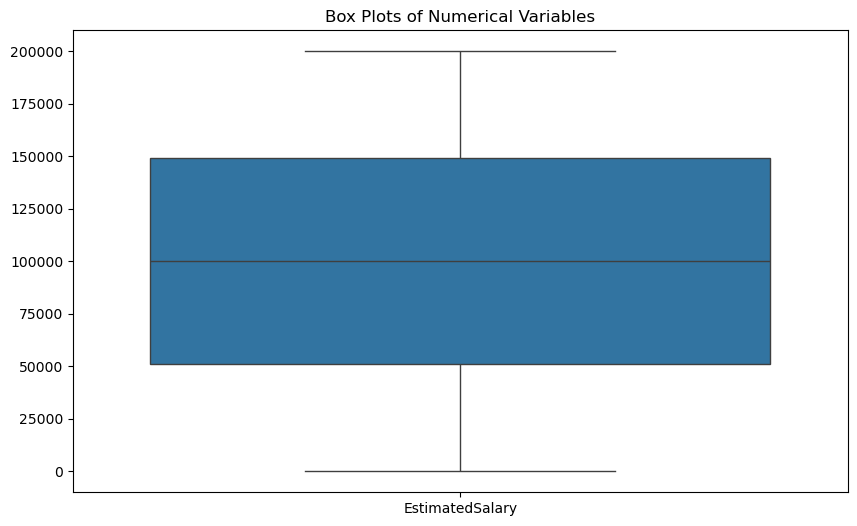

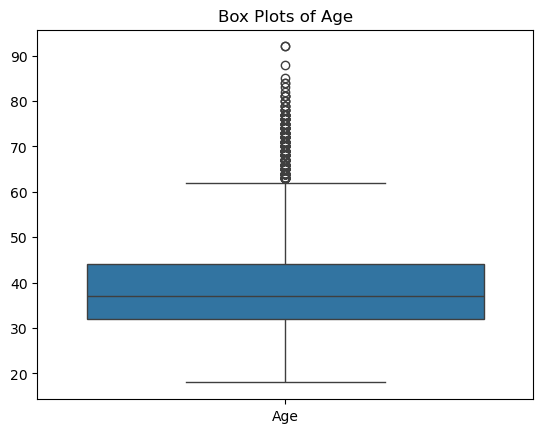

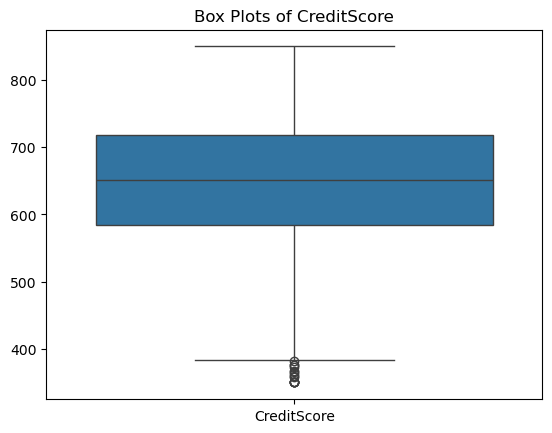

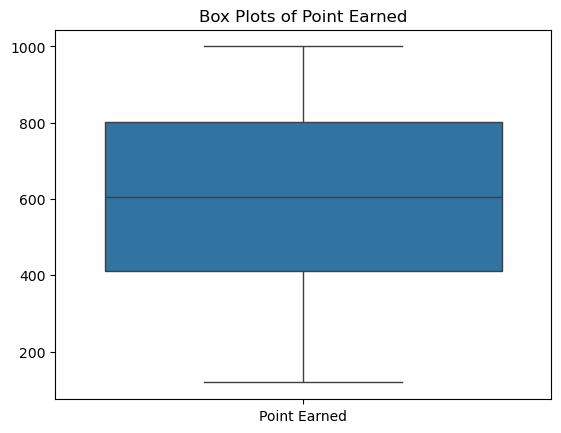

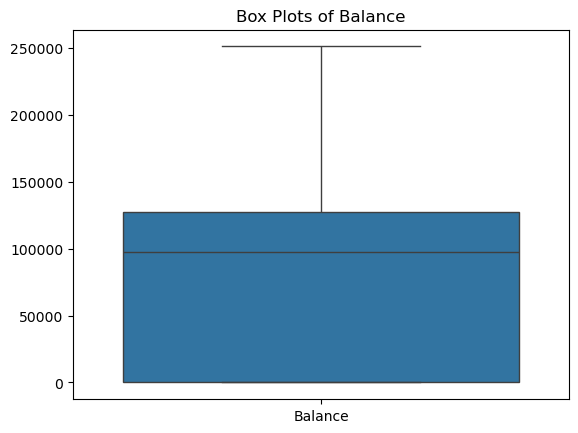

<Figure size 4000x4000 with 0 Axes>

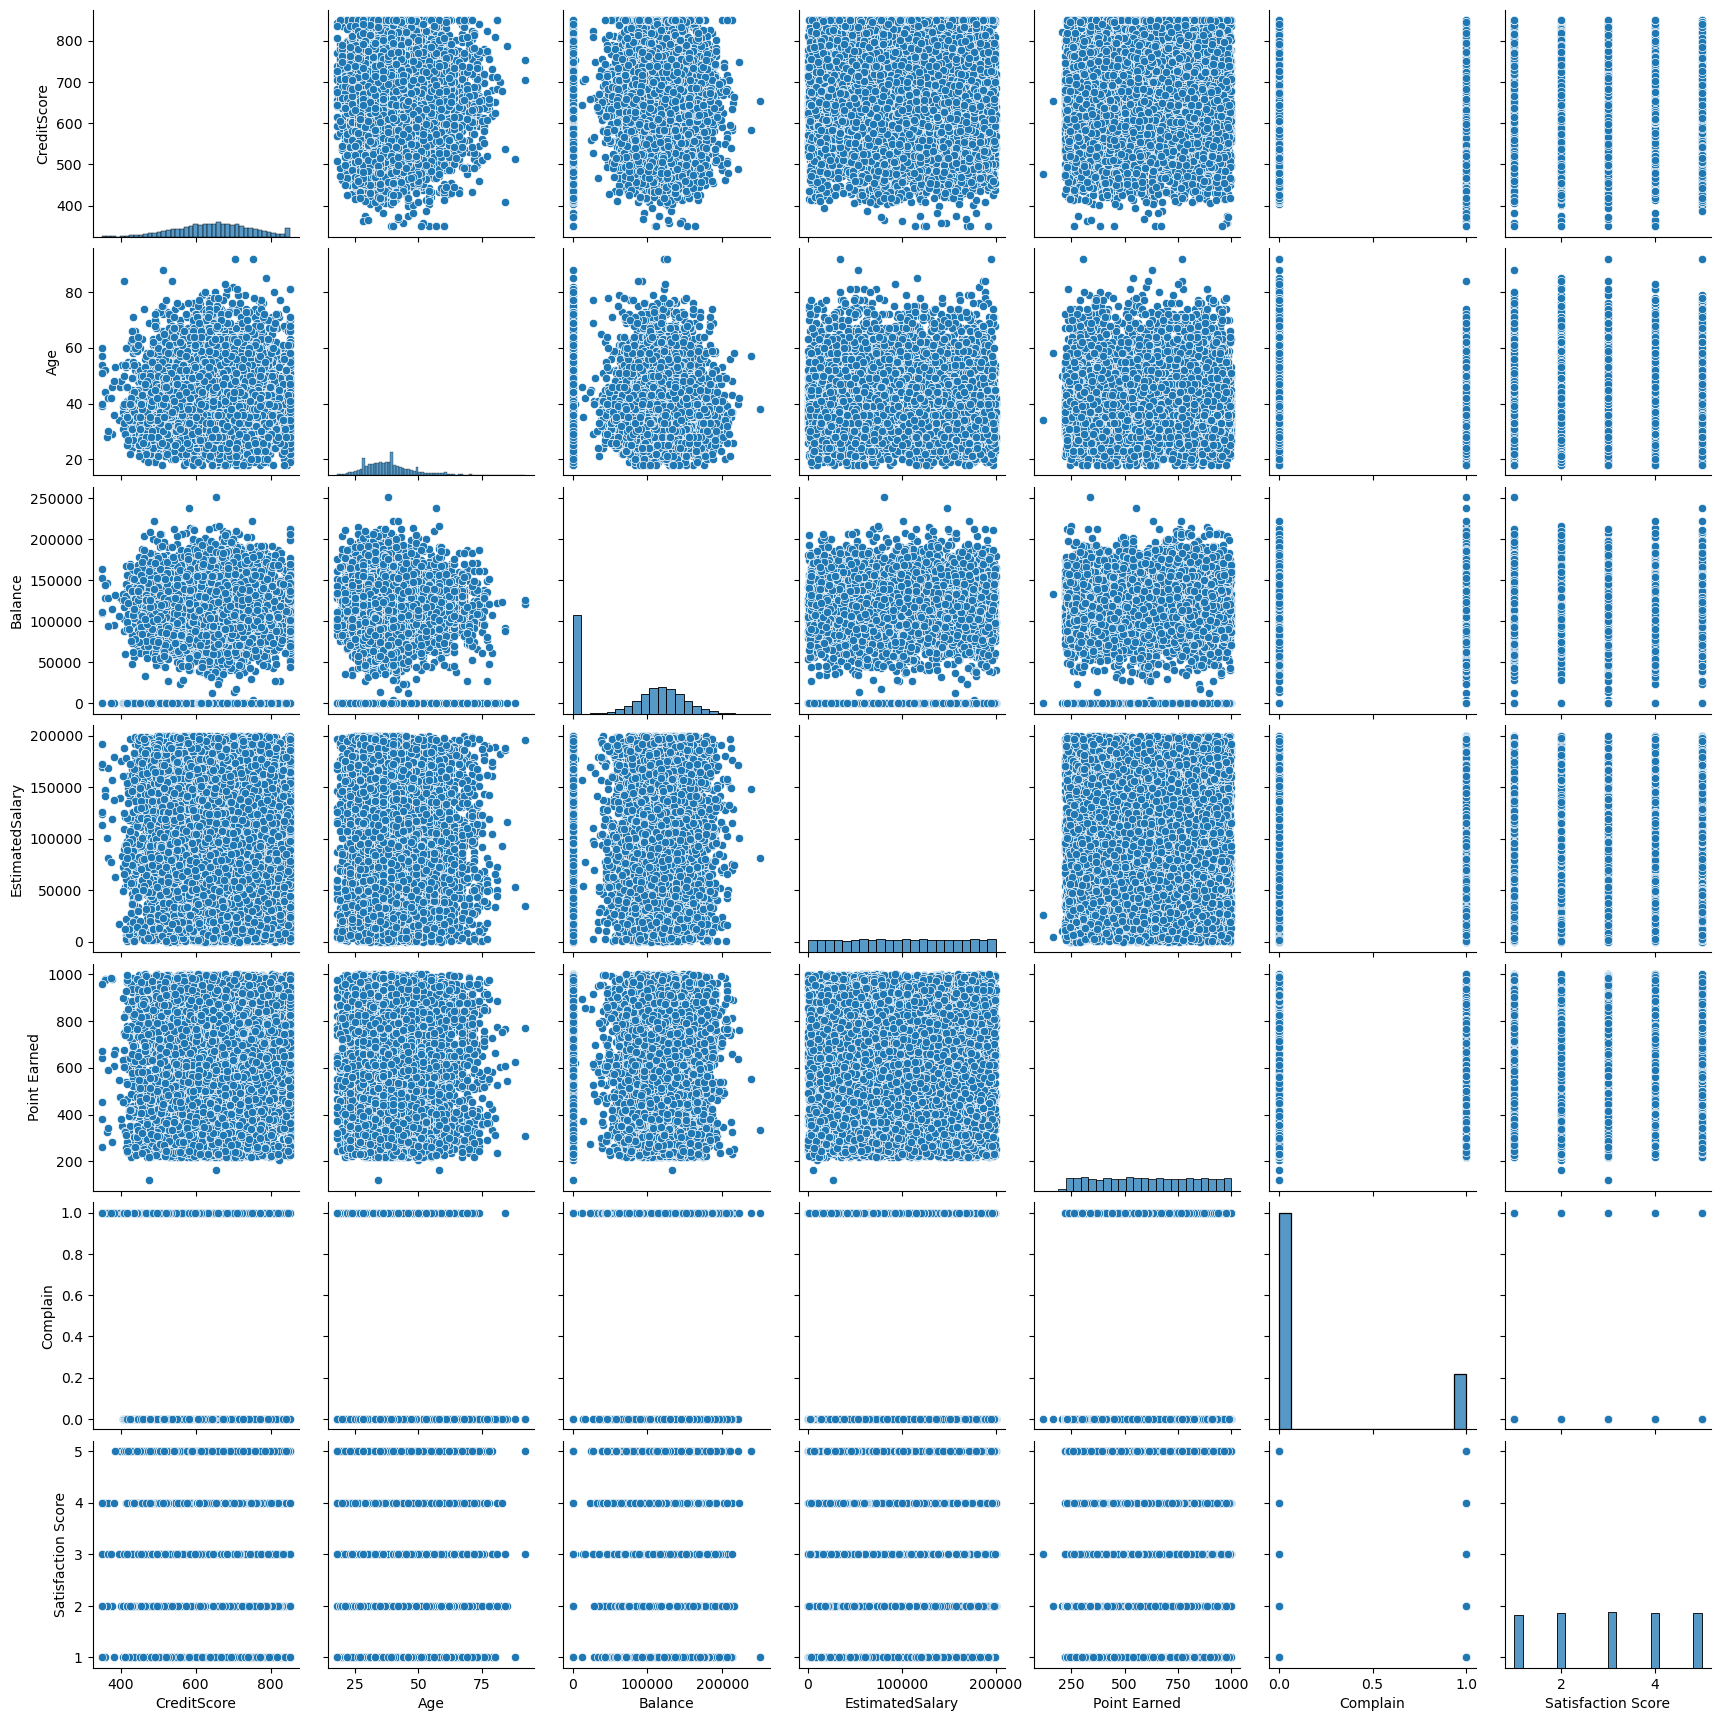

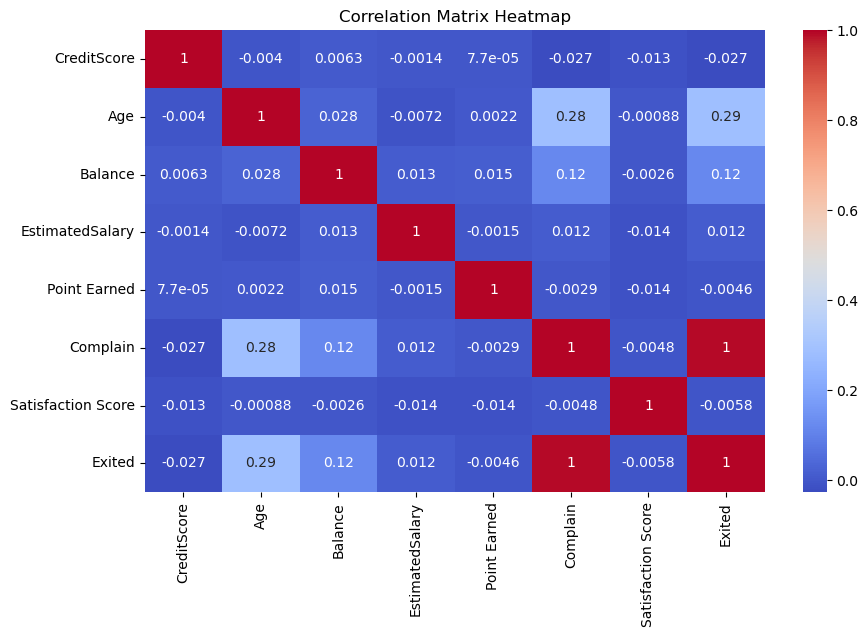

In [16]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[[ 'EstimatedSalary']])
plt.title('Box Plots of Numerical Variables')
plt.show()
sns.boxplot(data=data[[ 'Age']])
plt.title('Box Plots of Age')
plt.show()
sns.boxplot(data=data[[ 'CreditScore']])
plt.title('Box Plots of CreditScore')
plt.show()
sns.boxplot(data=data[[ 'Point Earned']])
plt.title('Box Plots of Point Earned')
plt.show()
sns.boxplot(data=data[[ 'Balance']])
plt.title('Box Plots of Balance')
plt.show()
# Scatter plots
plt.figure(figsize=(40, 40))
sns.pairplot(data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Point Earned','Complain','Satisfaction Score']])
plt.show()

# Correlation matrix and heatmap
corr_matrix = data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Point Earned','Complain','Satisfaction Score','Exited']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

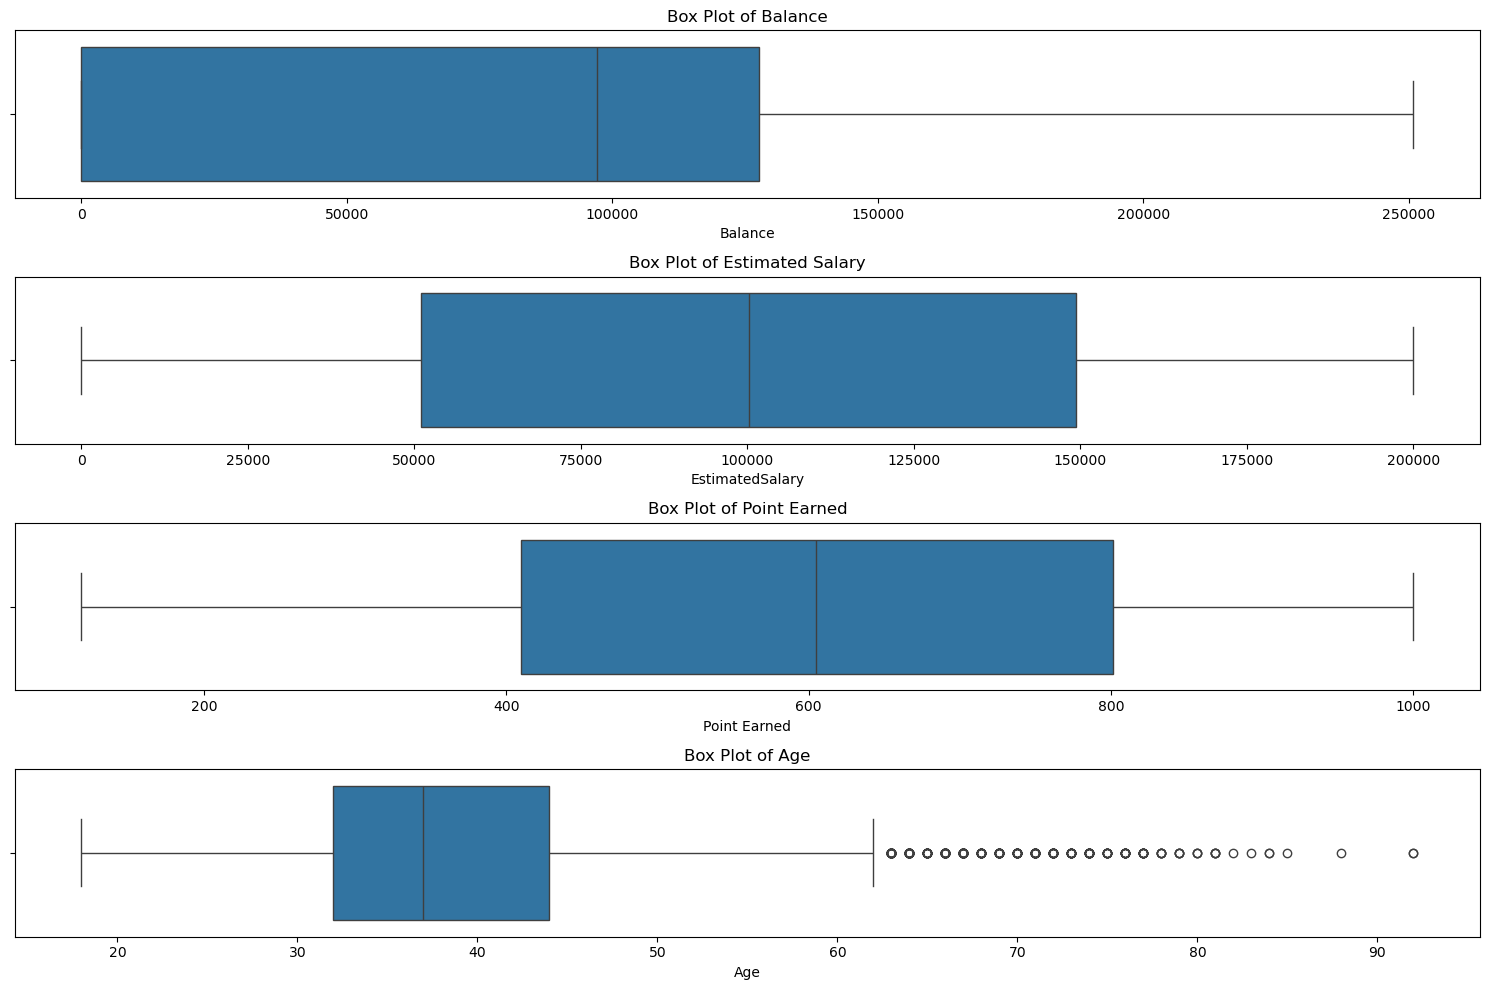

Number of outliers in Balance: 0
Number of outliers in Estimated Salary: 0
Number of outliers in Point Earned: 0
Number of outliers in Age: 359


In [17]:
plt.figure(figsize=(15, 10))

# Balance
plt.subplot(4, 1, 1)
sns.boxplot(x=data['Balance'])
plt.title('Box Plot of Balance')

# Estimated Salary
plt.subplot(4, 1, 2)
sns.boxplot(x=data['EstimatedSalary'])
plt.title('Box Plot of Estimated Salary')

# Point Earned
plt.subplot(4, 1, 3)
sns.boxplot(x=data['Point Earned'])
plt.title('Box Plot of Point Earned')

plt.subplot(4, 1, 4)
sns.boxplot(x=data['Age'])
plt.title('Box Plot of Age')

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
def identify_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_balance = identify_outliers('Balance')
outliers_estimated_salary = identify_outliers('EstimatedSalary')
outliers_point_earned = identify_outliers('Point Earned')
outliers_Age = identify_outliers('Age')

print(f"Number of outliers in Balance: {outliers_balance.shape[0]}")
print(f"Number of outliers in Estimated Salary: {outliers_estimated_salary.shape[0]}")
print(f"Number of outliers in Point Earned: {outliers_point_earned.shape[0]}")
print(f"Number of outliers in Age: {outliers_Age.shape[0]}")

In [18]:
z_scores = np.abs((data["Age"] - data["Age"].mean()) / data["Age"].std())

# Identify outliers (z-score threshold of 3)
outliers = data[z_scores > 3]
print("Number of outliers based on z-score:", outliers.shape[0])
display(outliers[['Age']])

Number of outliers based on z-score: 133


,Age
85,75
158,73
230,72
252,79
310,80
...,...
9646,71
9671,78
9736,78
9894,77


In [19]:
percentile_95 = data["Age"].quantile(0.95)
data.loc[z_scores >= 3, "Age"] = percentile_95
outliers = data[z_scores > 3]
display(outliers[['Age']])

,Age
85,60
158,60
230,60
252,60
310,60
...,...
9646,60
9671,60
9736,60
9894,60


In [20]:
# Select a random sample from the dataset
sample_size = 1000  # Define the sample size
random_sample = data.sample(n=sample_size, random_state=42)
display(random_sample.head())

# Apply bootstrapping techniques
bootstrap_sample = resample(data, replace=True, n_samples=1000)
print("\nbootstrap_sample Dimensions:")
print(f"Row count:{bootstrap_sample.shape[0]}")
print(f"Attribute count:{bootstrap_sample.shape[1]}")
print(" ")
#To print a small sample of the DataFrame data, we can use the `head()` method.
print("\nbootstrap_sample Data:")
display(bootstrap_sample.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
6252,6253,15687492,Anderson,596,VIC,Male,32,3,96709.07,2,0,0,41788.37,0,0,1,GOLD,709
4684,4685,15736963,Herring,623,NSW,Male,43,1,0.00,2,1,1,146379.30,0,0,2,SILVER,508
1731,1732,15721730,Amechi,601,QLD,Female,44,4,0.00,2,1,0,58561.31,0,0,1,GOLD,281
4742,4743,15762134,Liang,506,VIC,Male,59,8,119152.10,2,1,1,170679.74,0,0,2,SILVER,979
4521,4522,15648898,Chuang,560,QLD,Female,27,7,124995.98,1,1,1,114669.79,0,0,5,SILVER,457



bootstrap_sample Dimensions:
Row count:1000
Attribute count:18
 

bootstrap_sample Data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9767,9768,15610419,Chukwueloka,554,NSW,Male,33,3,117413.95,1,1,1,12766.74,0,0,5,PLATINUM,574
4377,4378,15696301,Snider,719,NSW,Female,37,9,101455.70,1,1,0,25803.59,1,1,3,PLATINUM,844
5077,5078,15731829,Simmons,616,NSW,Male,34,10,0.00,2,1,0,25662.27,0,0,4,SILVER,279
866,867,15808017,Cary,545,NSW,Male,38,1,88293.13,2,1,1,24302.95,0,0,3,GOLD,331
4910,4911,15706463,Yang,597,NSW,Female,36,9,0.00,2,1,1,7156.09,0,0,2,SILVER,323


In [21]:
#Calculate the mean and standard deviation of the original 'EstimatedSalary' column
original_mean = data['EstimatedSalary'].mean()
original_std = data['EstimatedSalary'].std()

# Creating bootstrap samples and calculating mean for each sample
bootstrap_means = []
for _ in range(1000):
    bootstrap_sample = resample(data['EstimatedSalary'], replace=True, n_samples=500)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the mean and standard deviation of the bootstrap means
bootstrap_mean_of_means = np.mean(bootstrap_means)
bootstrap_std_of_means = np.std(bootstrap_means)

# Compare with the original statistics
print(f"Original Mean: {original_mean:.2f}, Original Standard Deviation: {original_std:.2f}")
print(f"Bootstrap Mean of Means: {bootstrap_mean_of_means:.2f}, Bootstrap Standard Deviation of Means: {bootstrap_std_of_means:.2f}")

Original Mean: 100090.24, Original Standard Deviation: 57510.49
Bootstrap Mean of Means: 100201.39, Bootstrap Standard Deviation of Means: 2578.87


Original vs. Bootstrap Mean: The original mean ($100,090.24) and the bootstrap mean of means ($100,134.69) are very close, indicating that the bootstrapping technique provides a reliable estimate of the mean EstimatedSalary
The close match between the original mean and the bootstrap mean of means suggests that the bootstrapping technique is effective in estimating the central tendency of EstimatedSalary.

The original standard deviation ($57,510.49) is much higher than the bootstrap standard deviation of means ($2,508.40). This is expected because the bootstrap standard deviation of means measures the variability of the sample means, not the individual data points

statistical significance tests to evaluate the hypotheses related to customer churn. Here are the results, interpretations, and conclusions

T-statistic: 33.96625223583092
P-value: 1.9984680830038037e-239
 Older customers are more likely to churn than younger customers.
        Age Group  Churn Rate
0     Older (>40)        0.38
1  Younger (<=40)        0.11


/tmp/ipykernel_30/3021969762.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Churn Rate', data=churn_data, palette='viridis')


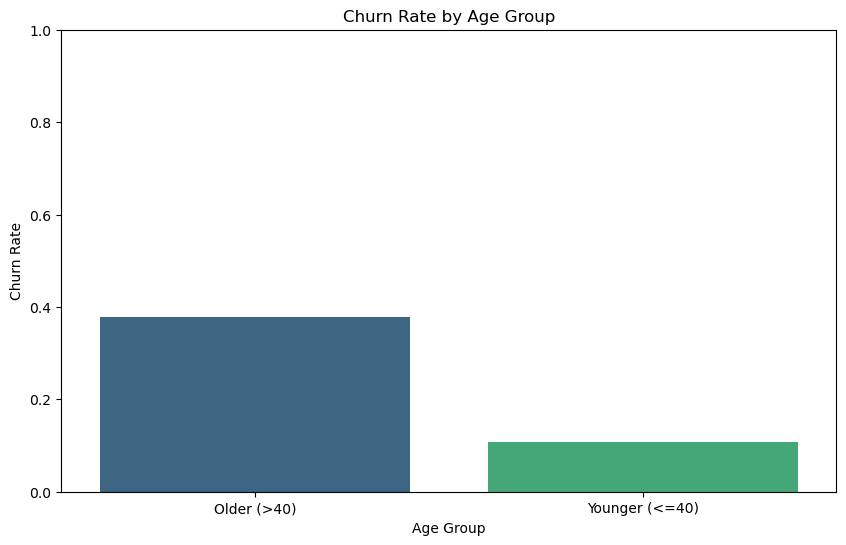

In [22]:
from scipy.stats import ttest_ind
# Load the data
df = pd.read_csv('Customer-Churn-Records 2025.csv')

# Hypothesis 1: Older customers are more likely to churn than younger customers
# Define the age threshold to separate older and younger customers
age_threshold = 40

# Separate the data into two groups: older customers and younger customers
older_customers = df[df['Age'] > age_threshold]
younger_customers = df[df['Age'] <= age_threshold]

# Perform a t-test on the 'Exited' column to test the hypothesis
t_stat, p_value = ttest_ind(older_customers['Exited'], younger_customers['Exited'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print(" Older customers are more likely to churn than younger customers.")
else:
    print(" There is no significant difference in churn rates between older and younger customers.")

# Visualize Age and Churn
# Calculate the churn rates for older and younger customers
churn_rate_older = older_customers['Exited'].mean()
churn_rate_younger = younger_customers['Exited'].mean()

# Create a DataFrame for visualization
churn_data = pd.DataFrame({
    'Age Group': ['Older (>40)', 'Younger (<=40)'],
    'Churn Rate': [churn_rate_older, churn_rate_younger]
})
print(churn_data.head())

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Churn Rate', data=churn_data, palette='viridis')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()



T-statistic: -11.493479432272553
P-value: 2.2069172116448232e-30
 customers with higher balances are more likely to churn
    Balance Group  Churn Rate
0   Lower Balance        0.16
1  Higher Balance        0.25


/tmp/ipykernel_30/2024405477.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Balance Group', y='Churn Rate', data=churn_data_balance, palette='viridis')


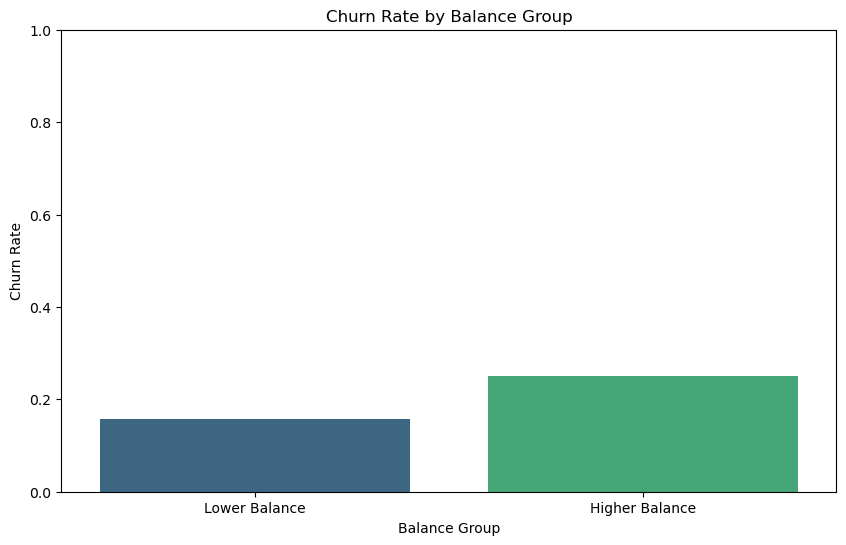

In [23]:
#Hypothesis 2 -customers with higher balances are more likely to churn
# Define the balance threshold to separate customers with lower and higher balances
balance_threshold = df['Balance'].median()

# Separate the data into two groups: customers with lower balances and customers with higher balances
lower_balance_customers = df[df['Balance'] <= balance_threshold]
higher_balance_customers = df[df['Balance'] > balance_threshold]

# Perform a t-test on the 'Exited' column to test the hypothesis
t_stat, p_value = ttest_ind(lower_balance_customers['Exited'], higher_balance_customers['Exited'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print(" customers with higher balances are more likely to churn")
else:
    print("There is no significant difference in churn rates between customers with lower and higher balances.")

    # Calculate the churn rates for customers with lower and higher balances
churn_rate_lower_balance = lower_balance_customers['Exited'].mean()
churn_rate_higher_balance = higher_balance_customers['Exited'].mean()

# Create a DataFrame for visualization
churn_data_balance = pd.DataFrame({
    'Balance Group': ['Lower Balance', 'Higher Balance'],
    'Churn Rate': [churn_rate_lower_balance, churn_rate_higher_balance]
})
print(churn_data_balance.head())

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Balance Group', y='Churn Rate', data=churn_data_balance, palette='viridis')
plt.title('Churn Rate by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Conclusion:
The results show that customers with higher balances have a higher churn rate (24.98%) compared to customers with lower balances (15.78%). This contradicts the initial hypothesis that customers with lower balances are more likely to churn.

T-statistic: -1.1915587548373734
P-value: 0.23346258980955034
 There is no significant difference in churn rates between customers with lower and higher estimated salaries.
Churn Rate for Lower Estimated Salary: 0.199
Churn Rate for Higher Estimated Salary: 0.2086


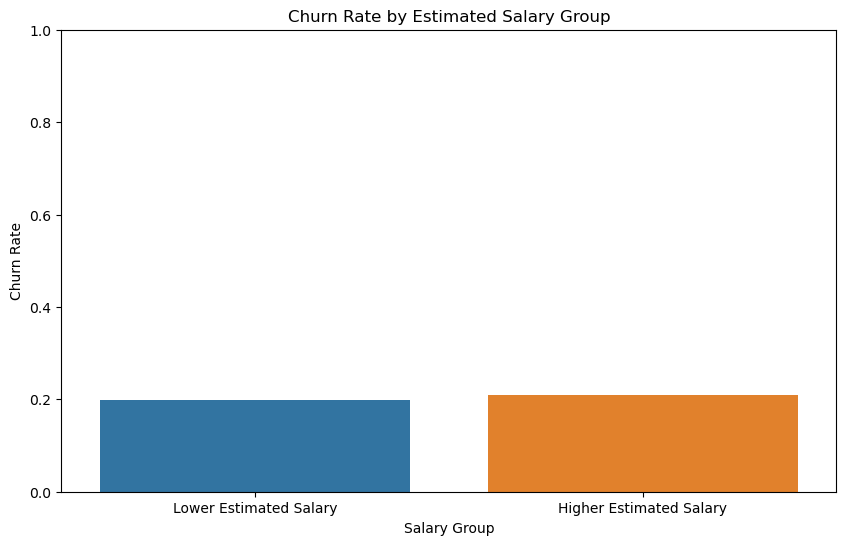

In [24]:
# Define the estimated salary threshold to separate customers with lower and higher estimated salaries
salary_threshold = df['EstimatedSalary'].median()

# Separate the data into two groups: customers with lower estimated salaries and customers with higher estimated salaries
lower_salary_customers = df[df['EstimatedSalary'] <= salary_threshold]
higher_salary_customers = df[df['EstimatedSalary'] > salary_threshold]

# Perform a t-test on the 'Exited' column to test the hypothesis
t_stat, p_value = ttest_ind(lower_salary_customers['Exited'], higher_salary_customers['Exited'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print(" Customers with lower estimated salaries are more likely to churn.")
else:
    print(" There is no significant difference in churn rates between customers with lower and higher estimated salaries.")

# Calculate the churn rates for customers with lower and higher estimated salaries
churn_rate_lower_salary = lower_salary_customers['Exited'].mean()
churn_rate_higher_salary = higher_salary_customers['Exited'].mean()

# Print the churn rates
print(f"Churn Rate for Lower Estimated Salary: {churn_rate_lower_salary}")
print(f"Churn Rate for Higher Estimated Salary: {churn_rate_higher_salary}")


# Create a DataFrame for visualization
churn_data_salary = pd.DataFrame({
    'Salary Group': ['Lower Estimated Salary', 'Higher Estimated Salary'],
    'Churn Rate': [churn_rate_lower_salary, churn_rate_higher_salary]
})

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary Group', y='Churn Rate', data=churn_data_salary,hue='Salary Group',legend=False)
plt.title('Churn Rate by Estimated Salary Group')
plt.xlabel('Salary Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Lower Estimated Salary: Churn rate is 19.9%.
Higher Estimated Salary: Churn rate is 20.86%.
This visualization shows that there is no significant difference in churn rates between customers with lower and higher estimated salaries, supporting the conclusion that we fail to reject the null hypothesis.

T-statistic: 2.774639210213834
P-value: 0.005536556089465076
Reject the null hypothesis: Customers with lower credit scores are more likely to churn.
Churn Rate for Lower Credit Score: 0.21489572989076464
Churn Rate for Higher Credit Score: 0.19254783484390736


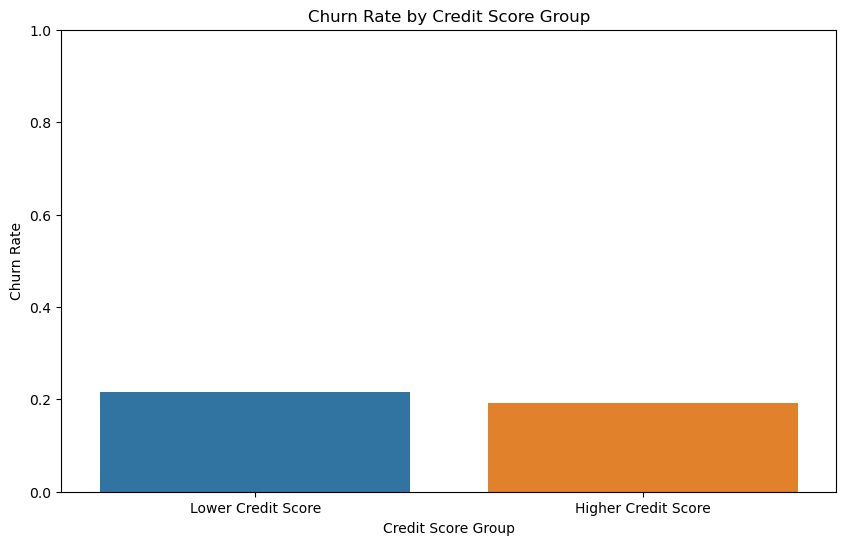

In [26]:
#hypothesis that customers with lower credit scores are more likely to churn
# Define the credit score threshold to separate customers with lower and higher credit scores
credit_score_threshold = df['CreditScore'].median()

# Separate the data into two groups: customers with lower credit scores and customers with higher credit scores
lower_credit_score_customers = df[df['CreditScore'] <= credit_score_threshold]
higher_credit_score_customers = df[df['CreditScore'] > credit_score_threshold]

# Perform a t-test on the 'Exited' column to test the hypothesis
t_stat, p_value = ttest_ind(lower_credit_score_customers['Exited'], higher_credit_score_customers['Exited'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: Customers with lower credit scores are more likely to churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates between customers with lower and higher credit scores.")

# Calculate the churn rates for customers with lower and higher credit scores
churn_rate_lower_credit_score = lower_credit_score_customers['Exited'].mean()
churn_rate_higher_credit_score = higher_credit_score_customers['Exited'].mean()

# Print the churn rates
print(f"Churn Rate for Lower Credit Score: {churn_rate_lower_credit_score}")
print(f"Churn Rate for Higher Credit Score: {churn_rate_higher_credit_score}")

# Create a DataFrame for visualization
churn_data_credit_score = pd.DataFrame({
    'Credit Score Group': ['Lower Credit Score', 'Higher Credit Score'],
    'Churn Rate': [churn_rate_lower_credit_score, churn_rate_higher_credit_score]
})

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit Score Group', y='Churn Rate', hue='Credit Score Group', data=churn_data_credit_score, legend=False)
plt.title('Churn Rate by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

 This means that customers with lower credit scores are significantly more likely to churn than those with higher credit scores

T-statistic: 1073.7975930429425
P-value: 0.0
Reject the null hypothesis: Customers who have raised complaints are more likely to churn.
Churn Rate for Complained Customers: 0.9951076320939335
Churn Rate for Not Complained Customers: 0.0005027652086475615


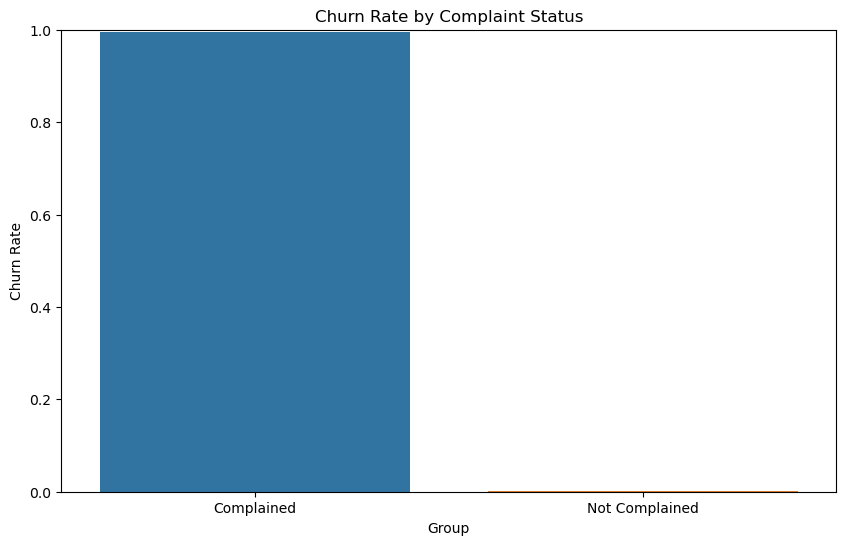

In [27]:
#Hypothesis:Customers who have raised complaints are more likely to churn.
# Separate the data into two groups based on complaint status
complained_customers = df[df['Complain'] == 1]
not_complained_customers = df[df['Complain'] == 0]

# Perform an independent two-sample t-test on the 'Exited' column to test the hypothesis
t_stat, p_value = ttest_ind(complained_customers['Exited'], not_complained_customers['Exited'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: Customers who have raised complaints are more likely to churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates between customers who have raised complaints and those who have not.")

# Calculate the churn rates for each group
churn_rate_complained = complained_customers['Exited'].mean()
churn_rate_not_complained = not_complained_customers['Exited'].mean()

# Print the churn rates
print(f"Churn Rate for Complained Customers: {churn_rate_complained}")
print(f"Churn Rate for Not Complained Customers: {churn_rate_not_complained}")

# Create a DataFrame for visualization
churn_data_complain = pd.DataFrame({
    'Group': ['Complained', 'Not Complained'],
    'Churn Rate': [churn_rate_complained, churn_rate_not_complained]
})

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Churn Rate', hue='Group', data=churn_data_complain, legend=False)
plt.title('Churn Rate by Complaint Status')
plt.xlabel('Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

The p-value (0.0) is less than 0.05,  This means that customers who have raised complaints are significantly more likely to churn than those who have not.

ANOVA Result: F-statistic = 369.488030919234, p-value = 3.1421639775735253e-297
Reject the null hypothesis: There is a significant difference in churn rates based on customer age groups.


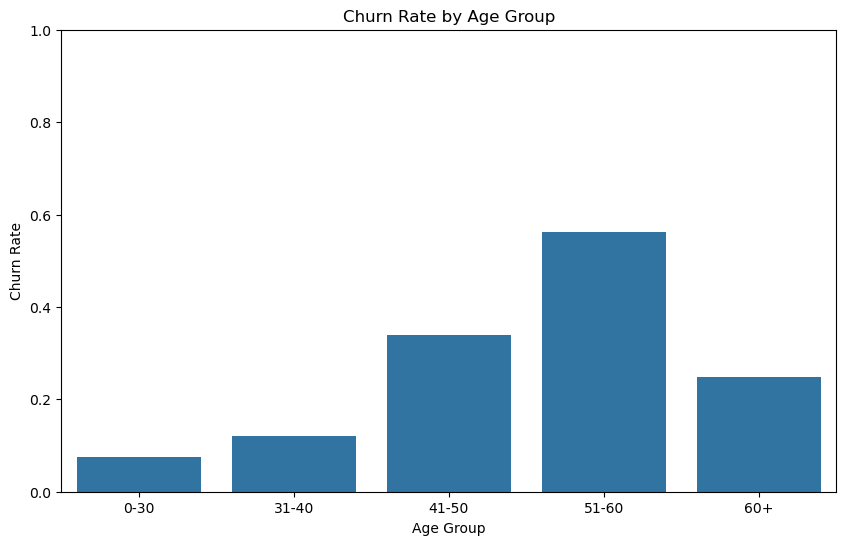

In [29]:
from scipy.stats import f_oneway
# Hypothesis: There is a significant difference in churn rates based on customer age groups

# Define age groups
age_groups = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])

# Add age groups to the DataFrame
df['AgeGroup'] = age_groups

# Perform ANOVA test on churn rates across different age groups
anova_result = f_oneway(df[df['AgeGroup'] == '0-30']['Exited'],
                        df[df['AgeGroup'] == '31-40']['Exited'],
                        df[df['AgeGroup'] == '41-50']['Exited'],
                        df[df['AgeGroup'] == '51-60']['Exited'],
                        df[df['AgeGroup'] == '60+']['Exited'])

# Print the results
print(f"ANOVA Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret the result
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in churn rates based on customer age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates based on customer age groups.")

# Calculate the mean churn rates for each age group
mean_churn_rates = df.groupby('AgeGroup',observed=False)['Exited'].mean().reset_index()

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Exited', data=mean_churn_rates)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

T-test Result for Exited (NSW vs QLD): T-statistic = -0.5468542260364871, p-value = 0.5845038974760847
T-test Result for Exited (NSW vs VIC): T-statistic = -15.207694711629063, p-value = 7.471970953794832e-51
T-test Result for Exited (QLD vs VIC): T-statistic = -13.164250274344553, p-value = 6.66995772793503e-39
Fail to reject the null hypothesis: There is no significant difference in exit status between NSW and QLD.
Reject the null hypothesis: There is a significant difference in exit status between NSW and VIC.
Reject the null hypothesis: There is a significant difference in exit status between QLD and VIC.


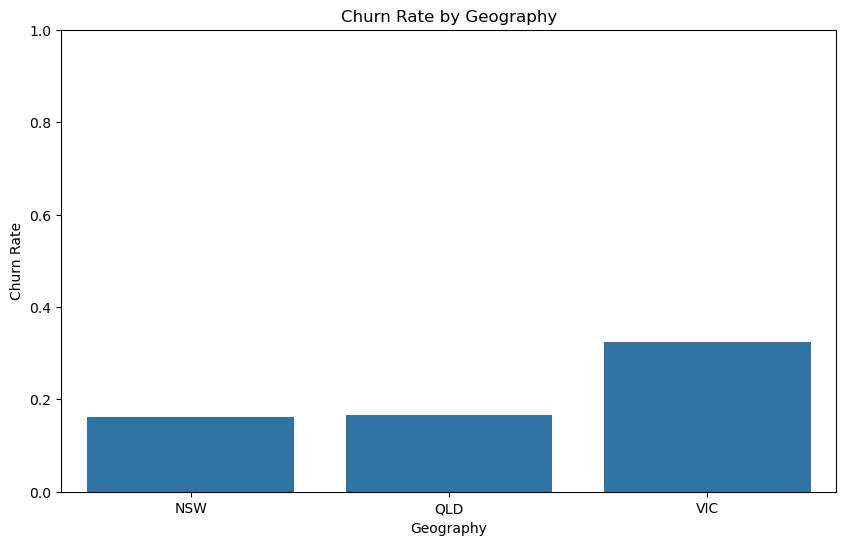

In [30]:
# Hypothesis: There is a difference in 'exit' status across different 'Geography'

# Perform t-test on 'Exited' status across different 'Geography'
t_stat_exited_nsw_qld, p_value_exited_nsw_qld = ttest_ind(df[df['Geography'] == 'NSW']['Exited'],
                                                          df[df['Geography'] == 'QLD']['Exited'],
                                                          equal_var=False)

t_stat_exited_nsw_vic, p_value_exited_nsw_vic = ttest_ind(df[df['Geography'] == 'NSW']['Exited'],
                                                          df[df['Geography'] == 'VIC']['Exited'],
                                                          equal_var=False)

t_stat_exited_qld_vic, p_value_exited_qld_vic = ttest_ind(df[df['Geography'] == 'QLD']['Exited'],
                                                          df[df['Geography'] == 'VIC']['Exited'],
                                                          equal_var=False)

# Print the results for 'Exited'
print(f"T-test Result for Exited (NSW vs QLD): T-statistic = {t_stat_exited_nsw_qld}, p-value = {p_value_exited_nsw_qld}")
print(f"T-test Result for Exited (NSW vs VIC): T-statistic = {t_stat_exited_nsw_vic}, p-value = {p_value_exited_nsw_vic}")
print(f"T-test Result for Exited (QLD vs VIC): T-statistic = {t_stat_exited_qld_vic}, p-value = {p_value_exited_qld_vic}")

# Interpret the result for 'Exited'
if p_value_exited_nsw_qld < 0.05:
    print("Reject the null hypothesis: There is a significant difference in exit status between NSW and QLD.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exit status between NSW and QLD.")

if p_value_exited_nsw_vic < 0.05:
    print("Reject the null hypothesis: There is a significant difference in exit status between NSW and VIC.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exit status between NSW and VIC.")

if p_value_exited_qld_vic < 0.05:
    print("Reject the null hypothesis: There is a significant difference in exit status between QLD and VIC.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exit status between QLD and VIC.")

# Calculate the mean Exited rates for each Geography
mean_exited_rates = df.groupby('Geography')['Exited'].mean().reset_index()

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Exited', data=mean_exited_rates)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

T-test Result for Exited (Male vs Female): T-statistic = -10.53630034129061, p-value = 8.306821850803944e-26
Reject the null hypothesis: There is a significant difference in churn rates between male and female customers.


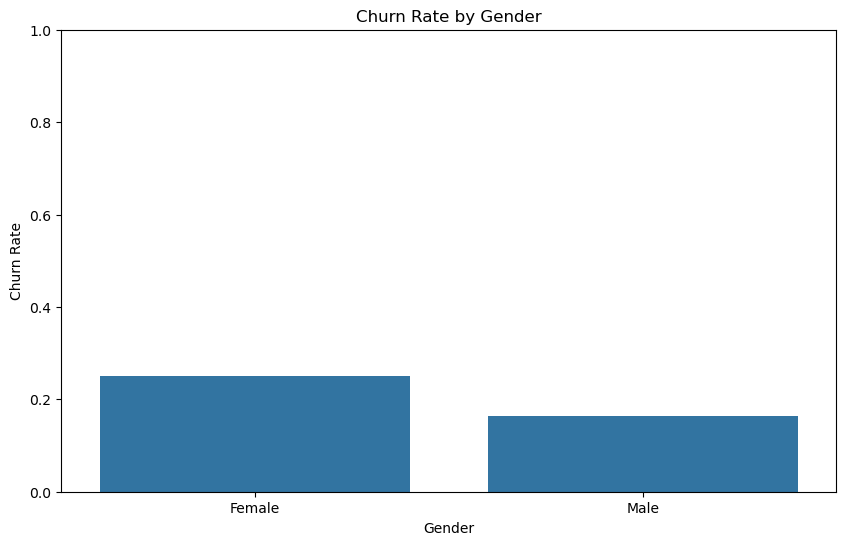

In [31]:
# Hypothesis: There is a significant difference in churn rates between male and female customers

# Perform t-test on 'Exited' status between male and female customers
t_stat_gender, p_value_gender = ttest_ind(df[df['Gender'] == 'Male']['Exited'],
                                          df[df['Gender'] == 'Female']['Exited'],
                                          equal_var=False)

# Print the results for 'Exited'
print(f"T-test Result for Exited (Male vs Female): T-statistic = {t_stat_gender}, p-value = {p_value_gender}")

# Interpret the result for 'Exited'
if p_value_gender < 0.05:
    print("Reject the null hypothesis: There is a significant difference in churn rates between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates between male and female customers.")

# Calculate the mean Exited rates for each Gender
mean_exited_rates_gender = df.groupby('Gender')['Exited'].mean().reset_index()

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Exited', data=mean_exited_rates_gender)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()